In [2]:
import cirq
import sympy
import numpy as np
from cirq.contrib.svg import SVGCircuit

In [3]:
W = sympy.symbols('W')

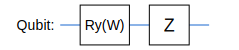

In [62]:
Qubit = cirq.NamedQubit("Qubit")

# Create a circuit on these qubits using the parameters you created above.
circuit = cirq.Circuit(
    cirq.ry(W).on(Qubit),
    cirq.Z.on(Qubit))
    #cirq.measure(Qubit, key='m'))

SVGCircuit(circuit)

In [63]:
def simulation(circuit, w=np.pi/2):
    cirq_simulator = cirq.Simulator()

    resolver = cirq.ParamResolver({W: w})
    result = cirq_simulator.simulate(circuit, resolver)
    return result

In [64]:
simulation(circuit, 0)

measurements: (no measurements)
output vector: |0⟩

In [65]:
simulation(circuit, np.pi/2)

measurements: (no measurements)
output vector: 0.707|0⟩ - 0.707|1⟩

In [66]:
simulation(circuit, np.pi)

measurements: (no measurements)
output vector: -1|1⟩

## 상태 측정

In [60]:
cirq_simulator = cirq.Simulator()
resolver = cirq.ParamResolver({W: np.pi/2})
#result = cirq_simulator.simulate(circuit, resolver)
output_sv = cirq.Simulator().simulate(circuit, resolver).final_state_vector
output_sv

array([0.70710677+0.j, 0.70710677+0.j], dtype=complex64)

In [61]:
z = cirq.Z(Qubit)
z.expectation_from_state_vector(output_sv, {Qubit: 0})

0j